In [1]:
# **Baseline Model**

In [2]:
# import libraies 
import numpy as np
import pandas as pd
from sklearn import metrics, model_selection, linear_model
import matplotlib.pyplot as plt

In [3]:
# Read the dataset
data = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')

In [4]:
# Exploration 
data.isna().sum()
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

In [5]:
categoricalfeatures = data.select_dtypes(include = ['O'])

In [6]:
NumericalFeatures = data.drop(columns = categoricalfeatures)

In [7]:
# Preprocessing the dataset 
transformed_data = pd.get_dummies(data, columns=['Country', 'Status']).astype(float)
transformed_data.fillna(transformed_data.mean(), inplace=True)
transformed_data.isna().sum()

Year                 0
Life expectancy      0
Adult Mortality      0
infant deaths        0
Alcohol              0
                    ..
Country_Yemen        0
Country_Zambia       0
Country_Zimbabwe     0
Status_Developed     0
Status_Developing    0
Length: 215, dtype: int64

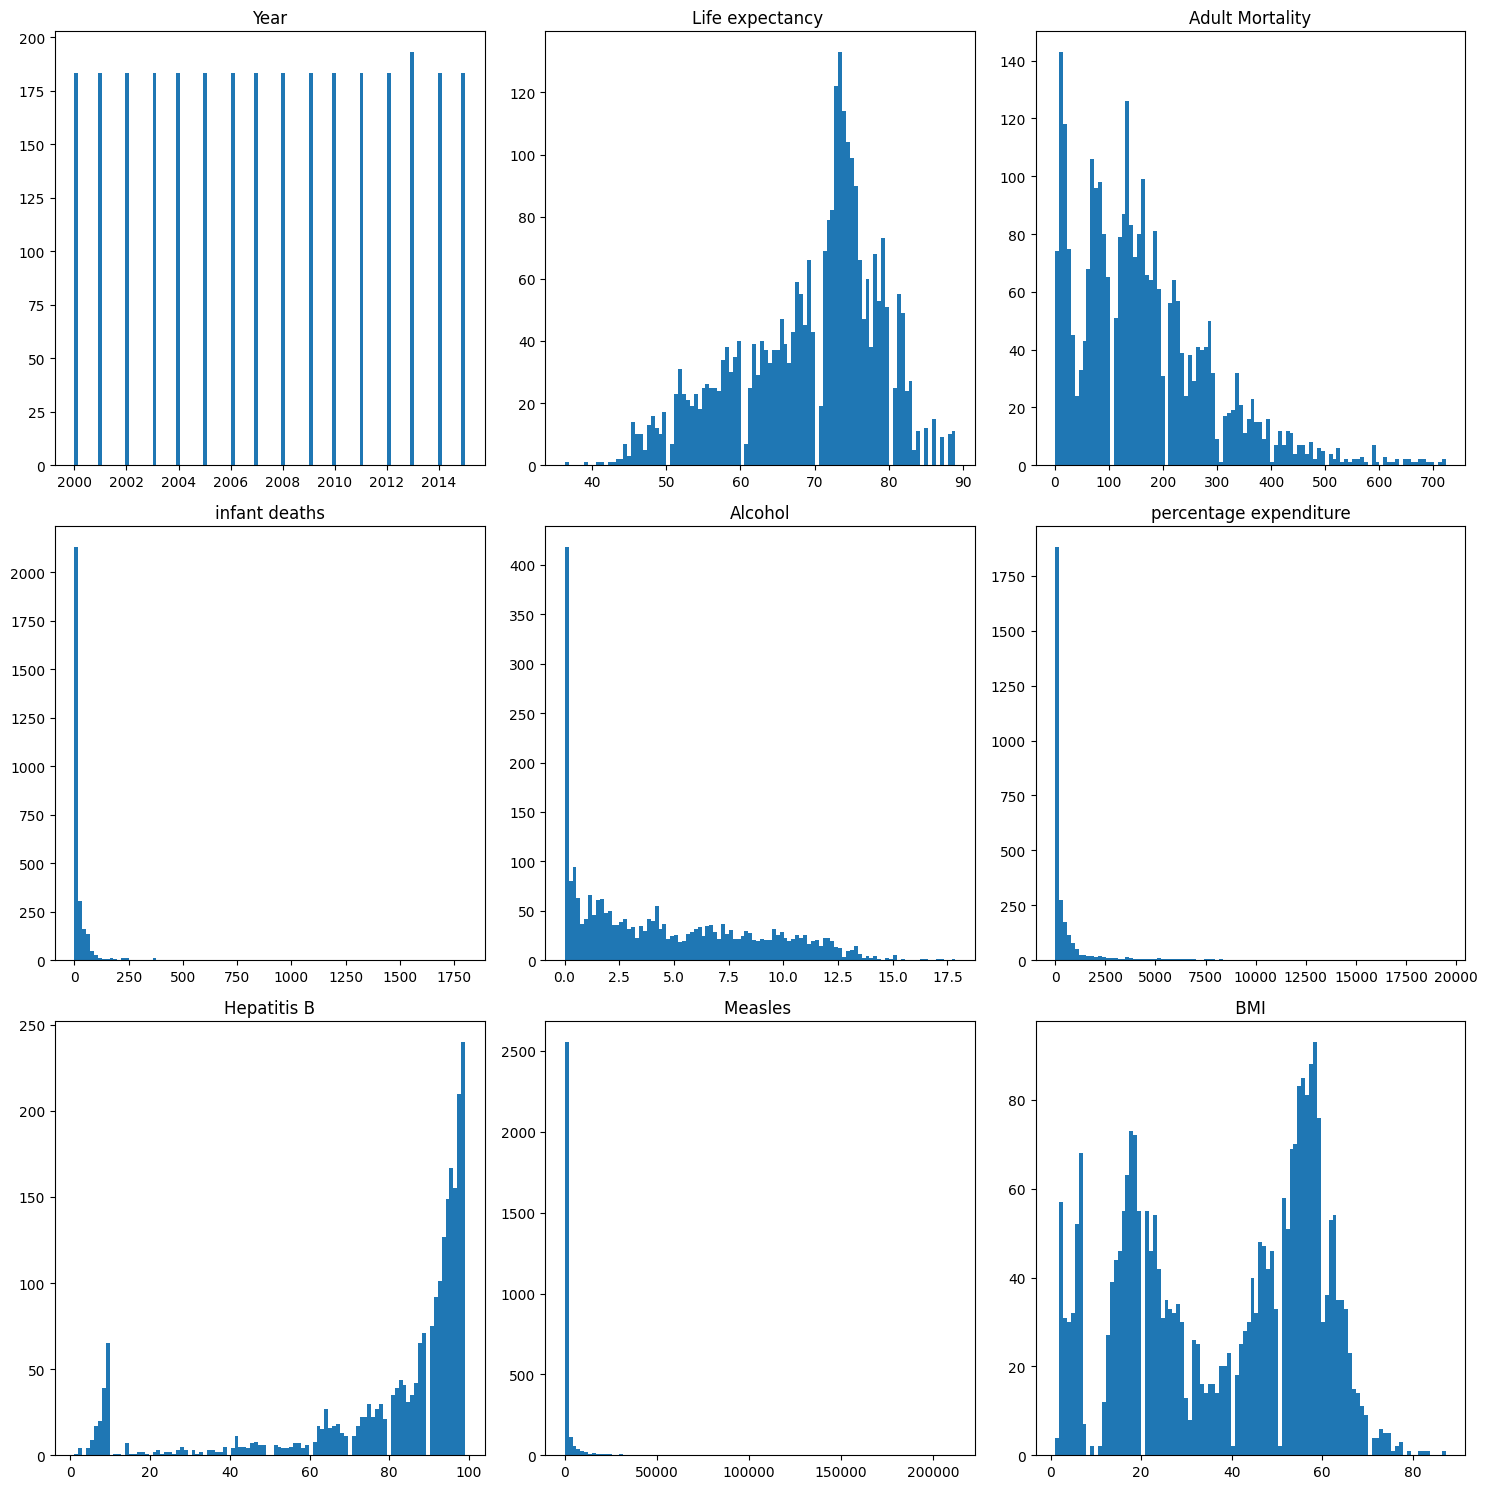

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for axis, feature in zip(axes.flatten(), NumericalFeatures.columns):
    axis.hist(data[feature], bins=100)
    axis.set_title(feature)
plt.tight_layout()
plt.show()


In [9]:
# Extract data and target
X = transformed_data.drop('Life expectancy ', axis='columns')
y = transformed_data['Life expectancy ']

In [10]:
# Splitting the data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state=42 ,shuffle=True)

In [11]:
# training the model
Regressor_ml = linear_model.LinearRegression()
Regressor_ml.fit(X_train, y_train)

LinearRegression()

In [12]:
# Prediction
y_pred = Regressor_ml.predict(X_test)

In [13]:
# model score
Regressor_ml.score(X_test, y_test)

0.9646897437183712

In [14]:
# Evaluation the model
MSerror = metrics.mean_squared_error(y_test, y_pred)
MAerror = metrics.mean_absolute_error(y_test, y_pred)
RMSerror = np.sqrt(MSerror)
print(f'Mean Squared Error : {MSerror}')
print(f'Mean Absolute Error : {MAerror}')
print(f'Root Mean Squared Error : {RMSerror}')

Mean Squared Error : 3.0591138306306216
Mean Absolute Error : 1.1552921484354974
Root Mean Squared Error : 1.7490322554574633


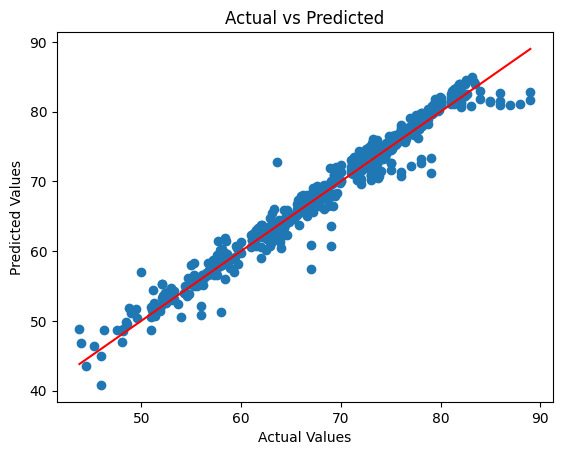

In [15]:
### Visualization the result
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

# **NN Model**

In [16]:
# import libraies 
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [17]:
# Load the dataset
df = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')

In [18]:
# Preprocessing
# Fill missing values with the mean for numerical columns and mode for categorical columns
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Split into features and target
X = df.drop('Life expectancy ', axis=1)
y = df['Life expectancy ']

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [20]:
# Define the model
class LifeExpectancyModel(nn.Module):
    def __init__(self, input_dim):
        super(LifeExpectancyModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [21]:
# Instantiate the model
input_dim = X_train.shape[1]
model = LifeExpectancyModel(input_dim)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [22]:
# Train the model
n_epochs = 100
for epoch in range(n_epochs):
    model.train()
    
    # Forward pass
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Print the loss
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 4824.8833
Epoch [20/100], Loss: 4748.8062
Epoch [30/100], Loss: 4625.5703
Epoch [40/100], Loss: 4422.7607
Epoch [50/100], Loss: 4104.6167
Epoch [60/100], Loss: 3641.4114
Epoch [70/100], Loss: 3024.6018
Epoch [80/100], Loss: 2286.1667
Epoch [90/100], Loss: 1510.5728
Epoch [100/100], Loss: 825.9525


In [23]:
# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    test_loss = mean_squared_error(y_test, y_pred_test)
    print(f'Test MSE: {test_loss:.4f}')


Test MSE: 803.6424
